######<b>Step-1 : Importing Libraries</b>

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVR
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

#####<b>Step-2 : Reading Dataset</b>

In [2]:
data = pd.read_csv('/content/USA_Housing.csv')

In [3]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


######<b>Step-3 : Removing unnecessary columns</b>

In [4]:
data = data.drop('Address',axis =1)
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


######<b>Step-4 : Visualizing each column relation with label (Output)</b>

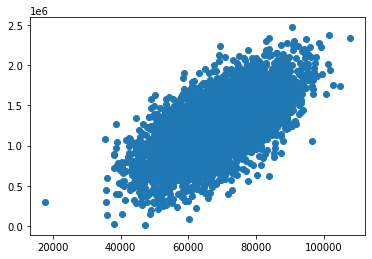

In [5]:
plt.scatter(data['Avg. Area Income'],data['Price'])
plt.show()

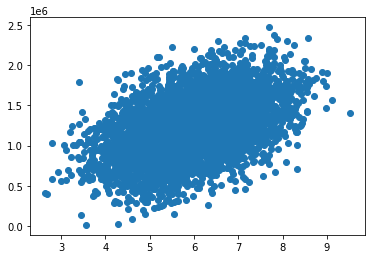

In [6]:
plt.scatter(data['Avg. Area House Age'],data['Price'])
plt.show()

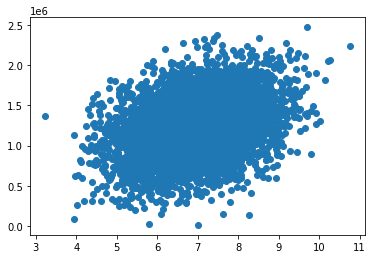

In [7]:
plt.scatter(data['Avg. Area Number of Rooms'],data['Price'])
plt.show()

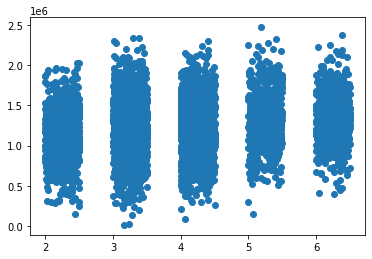

In [8]:
plt.scatter(data['Avg. Area Number of Bedrooms'],data['Price'])
plt.show()

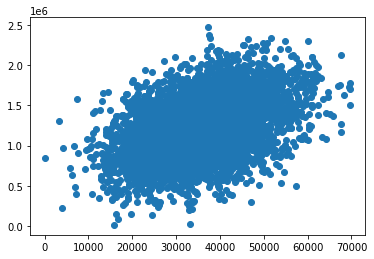

In [9]:
plt.scatter(data['Area Population'],data['Price'])
plt.show()

#####<b>Step-5 : Selecting input and label (output) Columns

In [10]:
X = data.drop('Price',axis = 1)
y = data['Price'].values.reshape(-1,1)

#####<b>Step-6 : Splitting Dataset into train and test</b>

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 2)

######<b>Step-7 : Apply Feature Scaling on Data for other models</b>

In [12]:
train_s = StandardScaler()
test_s = StandardScaler()
X_train = train_s.fit_transform(X_train)
X_test = test_s.fit_transform(X_test)
train_y = StandardScaler()
test_y = StandardScaler()
y_train = train_y.fit_transform(y_train)
y_test = test_y.fit_transform(y_test)

In [16]:
print(X_train)

[[-2.10900314  0.00486227 -1.19095254 -0.80631152 -0.34712803]
 [-0.57492441  0.52116386  0.69113435 -0.80631152  1.22742651]
 [ 0.92528188  1.02220354 -0.41836383  0.02610861 -1.05655813]
 ...
 [ 1.40466764  1.03671477  0.00379298  0.24645512 -1.16173837]
 [ 0.75262583 -0.14204456 -0.37466425 -1.47551203  0.00716435]
 [-0.30851073  1.75492047  0.01205712  1.66646594  0.35984117]]


######<b>Apply Ridge Regression on dataset

The reason for first applying this is it can do regularization as well

In [17]:
ridge = Ridge()

In [18]:
ridge.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [19]:
pred = ridge.predict(X_test)

In [20]:
print('R2-Score of our model is {}'.format(r2_score(y_test,pred)))
print('MSE of our model is {}'.format(mean_squared_error(y_test,pred)))
print('MAE of our model is {}'.format(mean_absolute_error(y_test,pred)))
print('RSE of our model is {}'.format(np.sqrt(mean_squared_error(y_test,pred))))

R2-Score of our model is 0.9178841984565547
MSE of our model is 0.08211580154344529
MAE of our model is 0.2318325236283017
RSE of our model is 0.28655854819468446


#####<b>Built Linear Regression Model on Data with default parameters</b>

In [21]:
LR = LinearRegression()

In [22]:
LR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
pred = LR.predict(X_test)

######<b>Model Results</b>

In [24]:
print('R2-Score of our model is {}'.format(r2_score(y_test,pred)))
print('MSE of our model is {}'.format(mean_squared_error(y_test,pred)))
print('MAE of our model is {}'.format(mean_absolute_error(y_test,pred)))
print('RSE of our model is {}'.format(np.sqrt(mean_squared_error(y_test,pred))))

R2-Score of our model is 0.9178907290095396
MSE of our model is 0.08210927099046039
MAE of our model is 0.23181995882732595
RSE of our model is 0.28654715317109747


######<b>Built Support Vector Machines on Dataset</b>

In [25]:
SVR = SVR()

In [26]:
SVR.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [27]:
pred = SVR.predict(X_test)

######<b>Model Results</b>

In [28]:
print('R2-Score of our model is {}'.format(r2_score(y_test,pred)))
print('MSE of our model is {}'.format(mean_squared_error(y_test,pred)))
print('MAE of our model is {}'.format(mean_absolute_error(y_test,pred)))
print('RSE of our model is {}'.format(np.sqrt(mean_squared_error(y_test,pred))))

R2-Score of our model is 0.9083335931091006
MSE of our model is 0.09166640689089946
MAE of our model is 0.24119315185328652
RSE of our model is 0.3027646064038851
